In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import statspy

**padding function**

In [26]:
def padding(image):
    padded_image = np.zeros((image.shape[0]+2,image.shape[1]+2))
    padded_image[1:image.shape[0]+1,1:image.shape[1]+1]=image 
    return padded_image

**Averaging**

In [24]:
def average_filter(image_data,filter_size):
    filter = np.ones((filter_size,filter_size))/(filter_size)**2
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]-1):
        for j in range(image_data.shape[1]-1):
            new_img[i][j] = np.sum((padded[i:i+filter_size,j:j+filter_size]*filter))
    return new_img

**median Filter**

In [4]:
def median_filter(image_data,filter_size):
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]-1):
        for j in range(image_data.shape[1]-1):
            new_img[i][j] = np.median(padded[i:i+filter_size,j:j+filter_size])
    return new_img

**gaussian Filter**

In [15]:
def gkernel(l=3, sig=2):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [70]:
from scipy import signal


def gaussian_filter(image, sigma):
    # create a 2D gaussian filter
    x, y = np.mgrid[-2:3, -2:3]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma*2))) * normal
    print(g.shape)
    # convolve the image with the gaussian filter
    filtered_image = signal.convolve2d(image, g, mode='same', boundary='symm')
    return filtered_image

(5, 5)


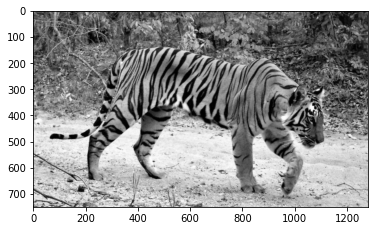

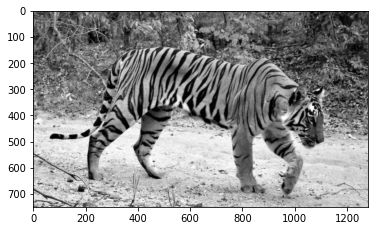

In [71]:
img = cv2.imread('./images/Tiger.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.GaussianBlur(img,(3,3),0.6)
plt.figure()
plt.imshow(img3,cmap='gray')
img2 = gaussian_filter(img,0.198)
plt.figure()
plt.imshow(img2,cmap='gray')

In [22]:
w = gkernel(7,0.9)
w

array([[1.49453385e-05, 3.27281023e-04, 2.08530635e-03, 3.86592014e-03,
        2.08530635e-03, 3.27281023e-04, 1.49453385e-05],
       [3.27281023e-04, 7.16697504e-03, 4.56651546e-02, 8.46579886e-02,
        4.56651546e-02, 7.16697504e-03, 3.27281023e-04],
       [2.08530635e-03, 4.56651546e-02, 2.90960459e-01, 5.39407507e-01,
        2.90960459e-01, 4.56651546e-02, 2.08530635e-03],
       [3.86592014e-03, 8.46579886e-02, 5.39407507e-01, 1.00000000e+00,
        5.39407507e-01, 8.46579886e-02, 3.86592014e-03],
       [2.08530635e-03, 4.56651546e-02, 2.90960459e-01, 5.39407507e-01,
        2.90960459e-01, 4.56651546e-02, 2.08530635e-03],
       [3.27281023e-04, 7.16697504e-03, 4.56651546e-02, 8.46579886e-02,
        4.56651546e-02, 7.16697504e-03, 3.27281023e-04],
       [1.49453385e-05, 3.27281023e-04, 2.08530635e-03, 3.86592014e-03,
        2.08530635e-03, 3.27281023e-04, 1.49453385e-05]])

In [29]:
img = cv2.imread('./images/Lenna_(test_image).png',cv2.IMREAD_GRAYSCALE)
img2 = average_filter(img,3)

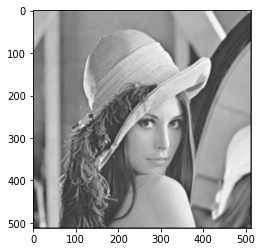

In [30]:
plt.imshow(img2,cmap='gray')

In [7]:
def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = statspy.basics.dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

In [41]:
def low_high_pass(image,selection,mask_size):
    x = 256-mask_size
    y = 256+mask_size
    img_fou = np.fft.fft2(image)
    img_fou = np.fft.fftshift(img_fou)
    if selection == "high":
        mask = np.ones((512,512))
        mask[x:y,x:y] = 0
    elif selection == "low":
        mask = np.zeros((512,512))
        mask[x:y,x:y] = 1
    new_fou = mask*img_fou
    new_fou = np.fft.ifftshift(new_fou)
    new_fou = np.fft.ifft2(new_fou)
    return np.abs(new_fou)

**High Pass**

In [8]:
def high_filter(image_data,filter_size=3):
    filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/9
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            new_img[i][j] = np.sum((padded[i:i+filter_size,j:j+filter_size]*filter))
    return new_img

**Gray Scale**

In [45]:
def rgb2gray(image):
    new_image = 0.299*image[:,:,0]+0.587*image[:,:,1]+0.114*image[:,:,2]
    return new_image

**Hybrid**

In [132]:
def hybrid(image1,image2):
    """image1: high filter image
    image2: low pass image"""
    image1 = rgb2gray(image1)
    image2 = rgb2gray(image2)
    image1 = low_high_pass(image1,'high',30)
    image2 = low_high_pass(image2,'low',30)
    new_image = image1+image2
    return new_image

In [133]:
image1 = cv2.imread('./images/Tiger.jpg')
image1 = cv2.resize(image1,(512,512))
image2 = cv2.imread('./images/elephant.jpg')
image2 = cv2.resize(image2,(512,512))

In [134]:
new_image = hybrid(image1,image2)

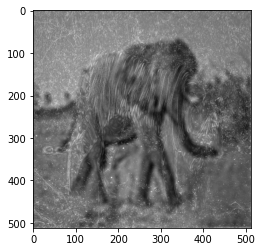

In [135]:
plt.imshow(new_image,cmap='gray')

In [49]:
def rgb_histogram(image):
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    plt.hist(r.ravel(),256,[0,256],color='r')
    plt.hist(g.ravel(),256,[0,256],color='g')
    plt.hist(b.ravel(),256,[0,256],color='b')
    plt.show()

In [60]:
img = cv2.imread('./images/Tiger.jpg')

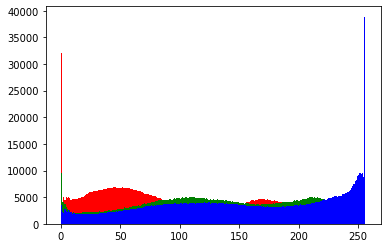

In [61]:
# img1 = rgb2gray(img)
img = rgb_histogram(img)
# img1 = np.array(img1,dtype='uint8')